In [1]:
import pandas as pd

from tqdm import tqdm

from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split

from news_vec.utils import read_json_gz_lines

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [5]:
accs = pd.DataFrame(list(tqdm(read_json_gz_lines('../../data/clf-imp-rows.json/'))))

3200it [00:00, 335636.62it/s]


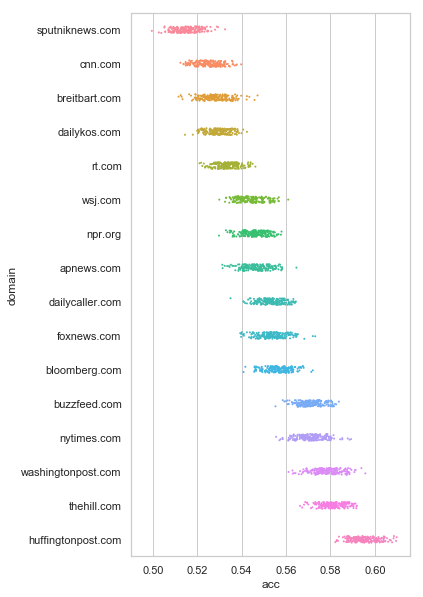

In [6]:
order = accs.groupby('domain').mean().sort_values('acc').index
plt.figure(figsize=(5,10))
sns.stripplot(x='acc', y='domain', data=accs, s=2, order=order)

In [7]:
articles = pd.DataFrame(list(tqdm(read_json_gz_lines('../../data/clf-articles.json/'))))

1130569it [00:18, 61017.38it/s]


In [10]:
min_count = articles.groupby('domain').size().min()

In [42]:
def imp_preds(domain):
    
    pdf = articles[articles.domain==domain].sample(min_count).copy()
    pdf['imp_rank'] = pdf.impressions.rank(pct=True)
    pdf['imp_high'] = pdf.imp_rank > 0.5
    
    rows_train, rows_test = train_test_split(pdf)
    
    X_train, y_train = rows_train.clf_tokens, rows_train.imp_high
    X_test, y_test = rows_test.clf_tokens, rows_test.imp_high
    
    tv = TfidfVectorizer(
        analyzer='word',
        tokenizer=lambda x: x,
        preprocessor=lambda x: x,
        ngram_range=(1,3),
        token_pattern=None,
    )
    
    X_train = tv.fit_transform(X_train)
    X_test = tv.transform(X_test)
    
    clf = LogisticRegression(solver='lbfgs')
    fit = clf.fit(X_train, y_train)
    
    ti = fit.classes_.tolist().index(True)
    
    preds = fit.predict_proba(X_test)
    
    rows_test = rows_test.copy()
    rows_test['p_high'] = preds[:,1]
    
    return rows_test

In [51]:
def plot_preds(domain):
    
    pdf = imp_preds(domain)
    
    for r in pdf.sort_values('p_high', ascending=False).head(20).itertuples():
        print(r.p_high, ' '.join(r.clf_tokens))
        
    print('\n')
    for r in pdf.sort_values('p_high', ascending=True).head(20).itertuples():
        print(r.p_high, ' '.join(r.clf_tokens))
    
    sns.jointplot(y='p_high', x='imp_rank', data=pdf, s=1)
    plt.show()

0.9383019746662268 donald trump confirms he called house gop health care bill mean
0.9210759271059354 house republicans pass tax bill
0.9013132123612578 ex fox news exec bill shine joins trump white house
0.8956250450598074 house republicans are helping donald trump keep his tax returns secret
0.8914444711519574 bill maher tears into trump s white house enablers
0.884667373008901 republicans could actually pass this health care bill
0.880407421238678 rudy warns mueller away from fine woman ivanka trump calls jared disposable
0.8795504266587103 here s ivanka trump s new dc house just blocks from the obamas
0.8761915514005064 house conservatives remain opposed to trump s health care bill with hours to go
0.8722451905428514 senate republicans just killed their health care bill again
0.8700738894070801 emboldened by trump georgia gop pushes anti lgbtq bill
0.866761087100121 gop house chair tells sean spicer to mind his own business on obamacare repeal
0.8621915427774774 white house admits 

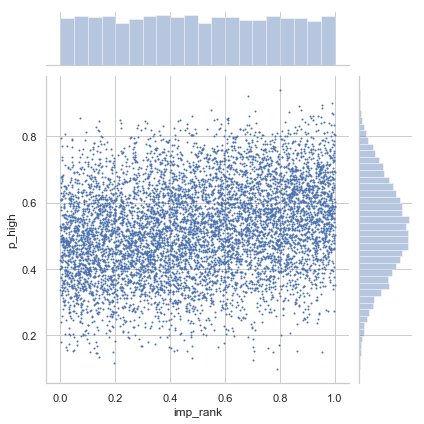

In [52]:
plot_preds('huffingtonpost.com')

0.9003258130470838 trump tweet telling sessions to end mueller probe was obstruction of justice
0.8905090234004547 plaid shirt guy ejected from trump rally says secret service told me not to come back
0.8876252512377413 stormy daniels lawyer claims hannity cohen relationship was extensive
0.8785620386694772 trump counsel recused his entire staff from mueller probe
0.8776669264325141 mueller to interview trump officials kushner aide
0.8713569474154534 stormy daniels sues trump lawyer for defamation
0.8605225221524315 trump not behaving like a president
0.853025891174088 flynn surely will roll over on kushner in mueller probe
0.849972595814196 russian lawyer believes she met ivanka after # trump tower meeting
0.8467959742146454 dangers multiply for trump in mueller probe
0.8439367081078282 omarosa has emulated trump
0.8406966377800676 judge halts stormy daniels effort to depose trump
0.8402469982219908 stormy daniels lawyer offers to send gift basket to fox news after giuliani interview


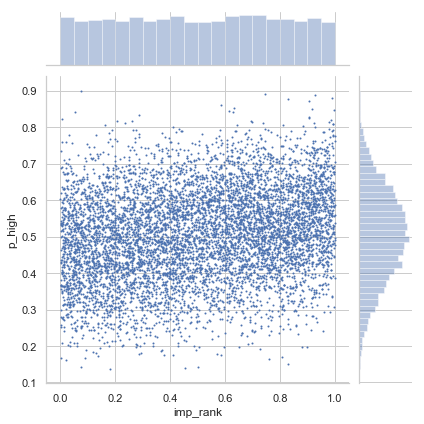

In [53]:
plot_preds('thehill.com')

0.9605815472866933 trump s besotted republicans
0.9228096957486775 trump s petticoat government
0.8711200275318969 a fascinating lawsuit from trump
0.8682410671316902 will the white house cancel as the trump world turns
0.8645368571098057 china deflects blame for opioid crisis as trump visit nears
0.8582729050996253 the trump administration prepares for what could be its first major natural disaster
0.8572436147158635 can president trump be presidential
0.8531159147036761 what is the antiquities act and why does president trump want to change it
0.852358670137487 condoleezza rice says donald trump represents american values
0.8503932018866405 analyzing trump s immigration ban
0.8412976607338821 colbert says sanders ca nt hide from trump s immigration policies
0.8377978733489286 trump ruins irony too
0.8346471750772216 the trump tariffs will cost americans jobs
0.833515838516803 for trump s nominees a billionaires guide to running the government
0.8310550961008456 france russia donald t

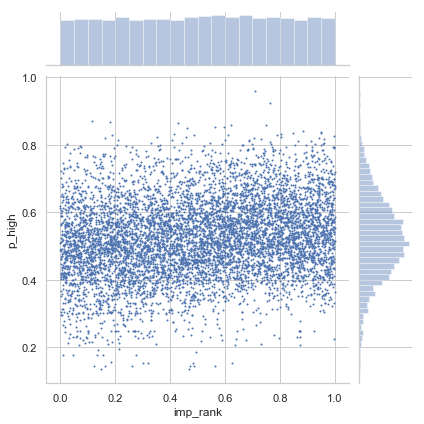

In [54]:
plot_preds('nytimes.com')

0.8793699122911584 trump s election did nt spark an immediate exodus from the federal government
0.8636951712014508 a federal judge said he ca nt force the irs to release trump s tax returns
0.8548713532762051 there s a bipartisan ticket trade for trump s inauguration
0.8499791901789084 a federal judge just ordered the trump administration to partially revive daca
0.8490290121055358 pay trump bribes here was projected across the entrance of trump s dc hotel
0.8450161316651082 how anti muslim propaganda travels from europe to north america to trump s twitter account
0.8400182555050337 the foreclosure crisis haunted the hearing for trump s treasury nominee
0.8380307216896038 a top trump aide has finally said whether the president believes climate change is happening
0.8351667994049085 president trump is on a twitter screed about fake news and cnn
0.8347880067409668 mcmaster mocked trump s intelligence at a private dinner
0.8266113431941908 president trump is under investigation for poten

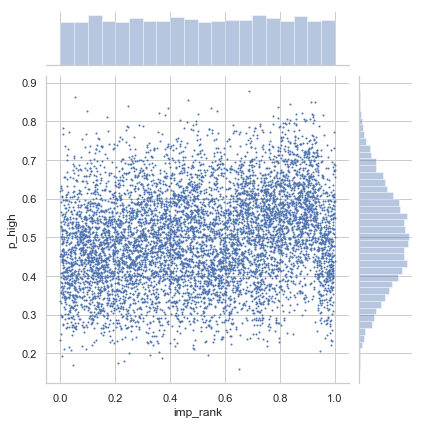

In [55]:
plot_preds('buzzfeed.com')

0.9132704434877962 the trump election commission exists solely to justify a trump lie
0.9059043829875959 republicans are tripping on trump s coattails
0.8943624183940663 the trump white house just tacitly endorsed anti muslim propaganda
0.8910545026886284 conservative gop members ask trump to declassify documents related to russia probe
0.8836913057829078 trump s fixation with size
0.8789917917206446 president trump is now holding the republican party hostage
0.876214275112678 mueller casts broad net in requesting extensive records from trump white house
0.8681272608764993 trump is supercharging the celebrification of politics
0.8673351734804176 trump s principled realism is an incoherent mess
0.8671370299580199 yup trump s a racist
0.8663484606182557 are republicans sowing the seeds of trump s demise
0.8655656818393017 did obama just threaten trump
0.8586337614711274 the trump white house is in deep legal trouble according to the trump s own standards
0.8566263241215895 the trump admi

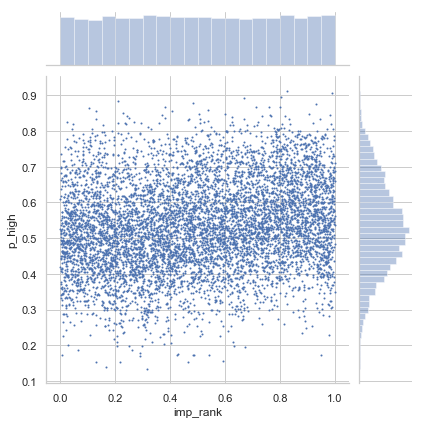

In [56]:
plot_preds('washingtonpost.com')